<a href="https://colab.research.google.com/github/KaeganCasey/digital_advertising_analytics-/blob/master/Python_Exercise_2_Travel_Pony_Ad_Cost_Regression_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
fp = 'drive/My Drive/Colab Notebooks/class/HW/Travel_Pony_Facebook.csv'
df = pd.read_csv(fp)
df.head()

,Start Date,End Date,Account,Campaign Name,Reach,Frequency,Impressions,Clicks,Unique Clicks,Amount Spent (USD),Page Likes,Page Engagement,Post Engagement,Post Likes,Post Comments,Post Shares,Photo Views,Website Clicks,Cost per Page Like (USD),Cost per Page Engagement (USD)
0,12/2/13,12/2/13,Bob Jackson,Cyber Weekend,278117,2.314303,643647,336,313,300.00,3,246,243,0,0,0,0,243,100.00,1.219512
1,12/1/13,12/1/13,Bob Jackson,Cyber Weekend,221255,2.079090,460009,376,348,300.00,6,215,209,0,0,0,0,209,50.00,1.395349
2,11/30/13,11/30/13,Bob Jackson,Cyber Weekend,267915,2.499069,669538,383,345,300.00,2,252,250,0,0,0,0,250,150.00,1.190476
3,11/29/13,11/29/13,Bob Jackson,Cyber Weekend,280332,2.365406,663099,301,275,300.00,3,257,254,0,0,0,0,254,100.00,1.167315
4,11/22/13,11/22/13,Bob Jackson,TravelPony: General Ads,14269,1.000420,14275,64,61,35.18,2,14,12,0,0,0,0,12,17.59,2.512857


In [0]:
#has a long output but looking at unique ads
# df["Campaign Name"].unique()

# Regular

### Q1

<Figure size 576x288 with 0 Axes>

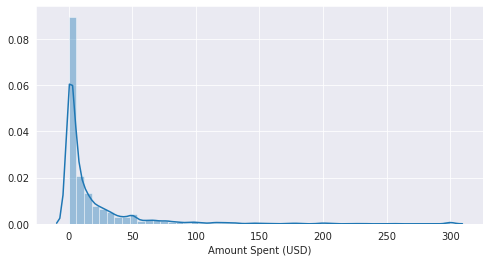

In [4]:
df = df.loc[df['Amount Spent (USD)'] != 0]

plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.distplot(df['Amount Spent (USD)'])

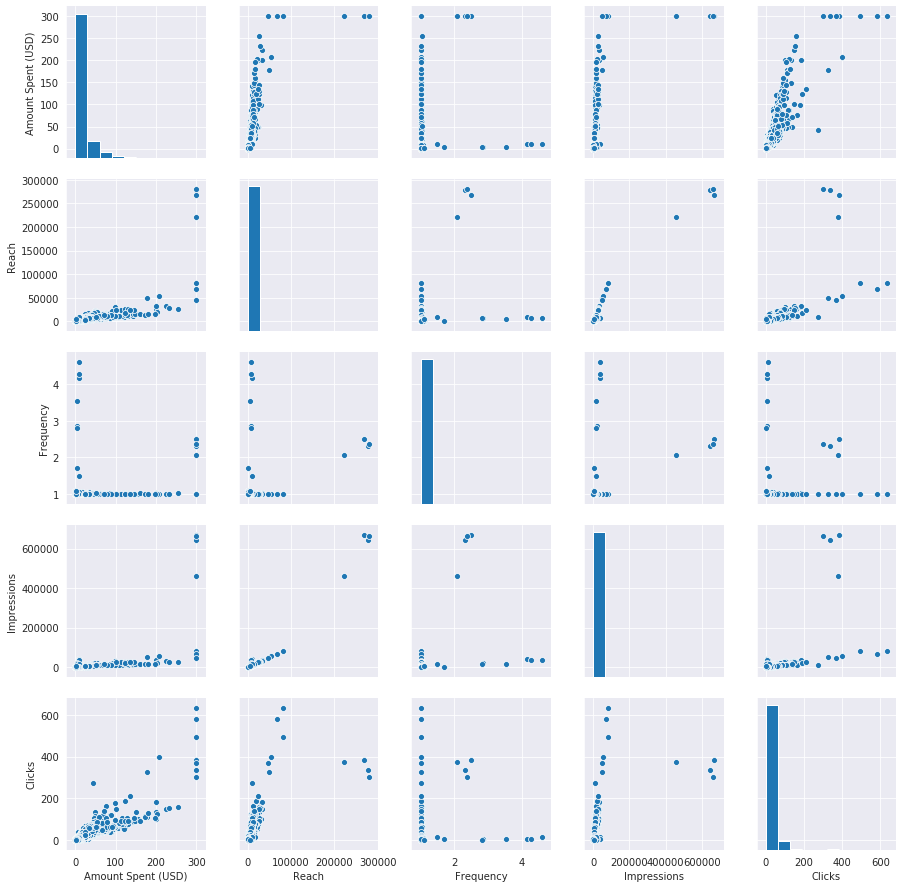

In [5]:
cols = ["Amount Spent (USD)", "Reach", "Frequency", "Impressions",  "Clicks"]
interest = df[cols]

sns.pairplot(interest)

### Q2

In [6]:
cols = ["Reach", "Frequency", "Impressions", "Clicks", "Unique Clicks",
       "Page Likes", "Page Engagement", "Post Engagement", "Post Likes", "Post Comments",
       "Post Shares", "Photo Views", "Website Clicks"]

X = df[cols]
dum = pd.get_dummies(df["Campaign Name"])
X = pd.concat([X, dum], axis=1)

y = df["Amount Spent (USD)"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

summ = model.summary()
summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     Amount Spent (USD)   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     78.55
Date:                Thu, 12 Dec 2019   Prob (F-statistic):               0.00
Time:                        04:23:04   Log-Likelihood:                -6125.9
No. Observations:                1802   AIC:                         1.304e+04
Df Residuals:                    1408   BIC:                         1.521e+04
Df Model:                         393                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Reach                                                           0.0030      0.000     16.921      0.000       0.003       0.003
Frequency                                                       7.6890      3.096      2.483      0.013       1.615      13.762
Impressions                                                    -0.0008   8.01e-05    -10.260      0.000      -0.001      -0.001
Clicks                                                         -0.2388      0.109     -2.185      0.029      -0.453      -0.024
Unique Clicks                                                   0.4621      0.121      3.806      0.000       0.224       0.700
Page Likes                                                     16.3728      8.450      1.938      0.053      -0.203      32.949
Page Engagement                                               -14.0592      8.445     -1.665      0.096     -30.626       2.508
Post Engagement                                                11.9816      7.040      1.702      0.089      -1.827      25.791
Post Likes                                                      1.8197      1.413      1.288      0.198      -0.952       4.591
Post Comments                                                   2.7753      1.479      1.877      0.061      -0.125       5.676
Post Shares                                                     2.5140      1.445      1.740      0.082      -0.321       5.349
Photo Views                                                     2.2671      1.410      1.608      0.108      -0.499       5.034
Website Clicks                                                  2.6055      1.410      1.848      0.065      -0.160       5.371
Ad 1                                                           -8.6574      4.304     -2.012      0.044     -17.099      -0.215
Cyber Weekend                                                -208.1785     25.716     -8.095      0.000    -258.624    -157.733
Nanigans_2_637                                                 -6.8641      5.700     -1.204      0.229     -18.046       4.318
Nanigans_2_638                                                 -6.0111      5.674     -1.059      0.290     -17.142       5.119
Nanigans_2_639                                                 -7.4490      5.669     -1.314      0.189     -18.569       3.671
Nanigans_2_640                                                -10.0477      5.161     -1.947      0.052     -20.172       0.077
Nanigans_2_641                                                 -9.8138      5.681     -1.728      0.084     -20.957       1.330
Nanigans_2_642                                                 -9.1921      5.693     -1.615      0.107     -20.360       1.976
Nanigans_2_

### Q3

In [7]:
model.params.sort_values(ascending=False)

TravelPony: Conversion Test                                     47.524674
Simple_Multi_Fill_Campaign_2_559                                19.002529
Page Likes                                                      16.372768
Simple_Multi_Fill_Campaign_2_601                                13.870900
Post Engagement                                                 11.981610
                                                                  ...    
Simple_Multi_Fill_Campaign_1_303                               -28.831657
Post: "You need to get some real sun and we are here to..."    -30.621127
TravelPony: General Ads                                        -37.182923
Nanigans_7_720                                                 -39.236896
Cyber Weekend                                                 -208.178529
Length: 395, dtype: float64

# Logged

### Q1

<Figure size 576x288 with 0 Axes>

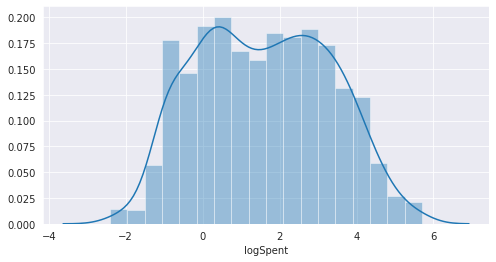

In [8]:
df['logSpent'] = np.log(df['Amount Spent (USD)'])
plt.figure(figsize=(8, 4))
sns.set_style('darkgrid')
sns.distplot(df['logSpent'])

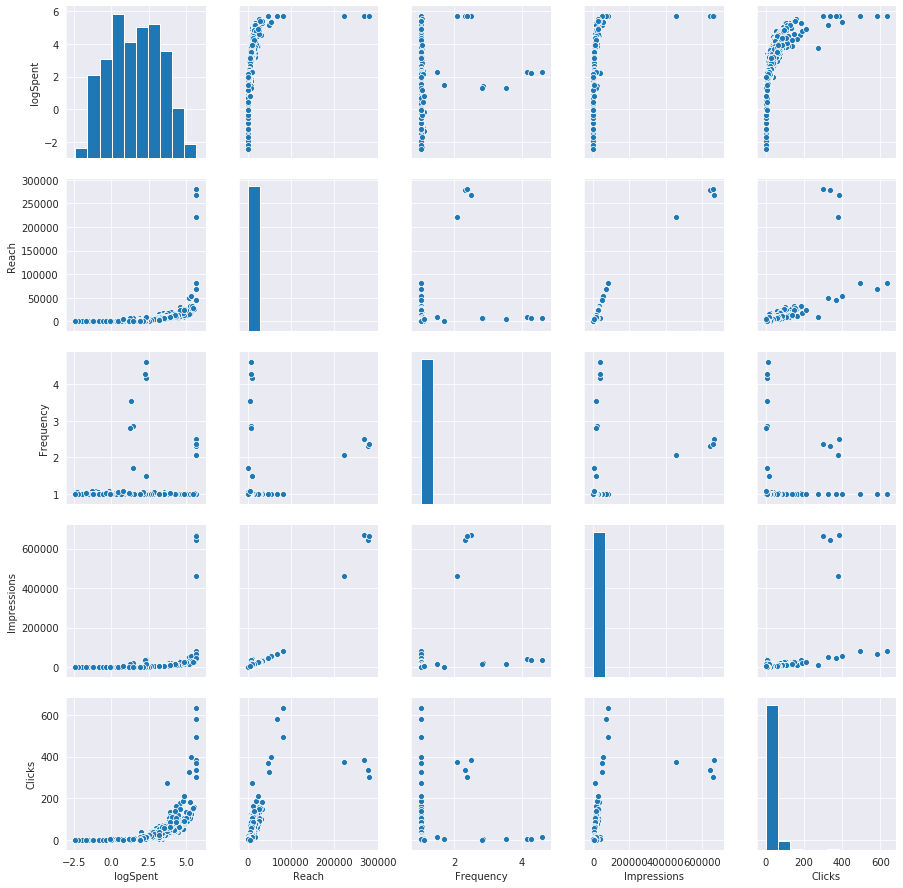

In [9]:
cols = ["logSpent", "Reach", "Frequency", "Impressions",  "Clicks"]
interest = df[cols]

sns.pairplot(interest)

### Q2

In [10]:
cols = ["Reach", "Frequency", "Impressions", "Clicks", "Unique Clicks",
       "Page Likes", "Page Engagement", "Post Engagement", "Post Likes", "Post Comments",
       "Post Shares", "Photo Views", "Website Clicks"]

X = df[cols]
dum = pd.get_dummies(df["Campaign Name"])
X = pd.concat([X, dum], axis=1)

y = df["logSpent"]
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

summ = model.summary()
summ

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               logSpent   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     13.33
Date:                Thu, 12 Dec 2019   Prob (F-statistic):          2.00e-292
Time:                        04:23:12   Log-Likelihood:                -2132.1
No. Observations:                1802   AIC:                             5052.
Df Residuals:                    1408   BIC:                             7218.
Df Model:                         393                                         
Covariance Type:            nonrobust                                         
===============================================================================================================================
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------
Reach                                                           0.0002   1.95e-05     10.530      0.000       0.000       0.000
Frequency                                                       0.7094      0.338      2.102      0.036       0.047       1.371
Impressions                                                 -5.532e-05   8.73e-06     -6.338      0.000   -7.24e-05   -3.82e-05
Clicks                                                         -0.0108      0.012     -0.908      0.364      -0.034       0.013
Unique Clicks                                                   0.0008      0.013      0.057      0.954      -0.025       0.027
Page Likes                                                      0.4364      0.921      0.474      0.636      -1.371       2.243
Page Engagement                                                -0.3341      0.921     -0.363      0.717      -2.140       1.472
Post Engagement                                                 0.2984      0.767      0.389      0.697      -1.207       1.804
Post Likes                                                      0.0977      0.154      0.634      0.526      -0.204       0.400
Post Comments                                                   0.0866      0.161      0.537      0.591      -0.230       0.403
Post Shares                                                     0.0213      0.158      0.135      0.893      -0.288       0.330
Photo Views                                                     0.0483      0.154      0.314      0.754      -0.253       0.350
Website Clicks                                                  0.0446      0.154      0.290      0.772      -0.257       0.346
Ad 1                                                           -0.8916      0.469     -1.901      0.058      -1.812       0.029
Cyber Weekend                                                 -14.8945      2.803     -5.313      0.000     -20.394      -9.395
Nanigans_2_637                                                  1.3564      0.621      2.183      0.029       0.137       2.575
Nanigans_2_638                                                  0.7968      0.619      1.288      0.198      -0.417       2.010
Nanigans_2_639                                                 -0.0255      0.618     -0.041      0.967      -1.238       1.187
Nanigans_2_640                                                  0.7229      0.563      1.285      0.199      -0.381       1.827
Nanigans_2_641                                                  0.2163      0.619      0.349      0.727      -0.998       1.431
Nanigans_2_642                                                  0.4560      0.621      0.735      0.463      -0.761       1.673
Nanigans_2_

### Q3

In [11]:
model.params.sort_values(ascending=False)

Nanigans_7_720                       1.914291
Nanigans_2_660                       1.459893
Simple_Multi_Fill_Campaign_2_636     1.448521
Simple_Multi_Fill_Campaign_2_620     1.382848
Nanigans_6_713                       1.360414
                                      ...    
Nanigans_5_709                      -1.923945
Simple_Multi_Fill_Campaign_1_478    -1.984898
Simple_Multi_Fill_Campaign_1_21     -2.035618
Simple_Multi_Fill_Campaign_1_461    -2.389224
Cyber Weekend                      -14.894488
Length: 395, dtype: float64